In [1]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_23683/3058677793.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rect to make room for the colorbar


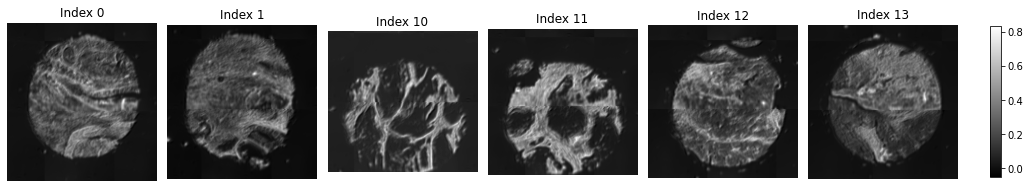

In [3]:
import numpy as np
import matplotlib.pyplot as plt

indices = ["0", "1", "10", "11", "12", "13"]
num_indices = len(indices)

# Set up a figure with multiple subplots
fig, axes = plt.subplots(1, num_indices, figsize=(15, 3))  # Adjust the figsize as necessary

for i, idx in enumerate(indices):
    # Load the current array
    data = np.load(f'data/data{idx}.npy')
    
    # Calculate the mean intensity across the channels for the current array
    mean_intensity = np.mean(data, axis=2)
    
    # Plot the mean intensity on the ith subplot
    ax = axes[i]
    im = ax.imshow(mean_intensity, cmap='gray')
    ax.set_title(f'Index {idx}')
    ax.axis('off')  # Hide the axis

# Create an axis for the colorbar to the right of the last subplot
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])  # Adjust the position as necessary
fig.colorbar(im, cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive, Dropdown, IntSlider

# Assuming 'indices' and 'mean_intensity' are available from previous steps
indices = ["0", "1", "10", "11", "12", "13"]

def load_data(idx):
    # Convert index to integer if it's passed as a string from the dropdown
    idx = int(idx)
    
    # Load the data at the given index
    data = np.load(f'data/data{indices[idx]}.npy')
    return np.mean(data, axis=2)

def plot_surface(idx='0', elev=30, azim=30):
    # Load data for the given index
    mean_intensity = load_data(idx)
    
    # Create the coordinates
    x = np.arange(mean_intensity.shape[1])
    y = np.arange(mean_intensity.shape[0])
    x, y = np.meshgrid(x, y)
    
    # Plotting
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.clear()
    ax.plot_surface(x, y, mean_intensity, cmap='viridis', edgecolor='none')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Mean Intensity')
    ax.view_init(elev=elev, azim=azim)
    
    # Show plot
    plt.show()

# Create a dropdown for the index and sliders for the viewing angles
index_dropdown = Dropdown(options=['0','1','2','3','4','5'], value='0', description='Index')
elev_slider = IntSlider(min=0, max=90, step=1, value=30, description='Elev')
azim_slider = IntSlider(min=0, max=360, step=1, value=30, description='Azim')

# Use the interactive function to bind the widgets to the plotting function
interactive_plot = interactive(plot_surface, idx=index_dropdown, elev=elev_slider, azim=azim_slider)
interactive_plot
